# Cluster Analysis
This notebook uses k-means clustering and Euclidean and Gower distances to find market segments for a female apparel store.

## Data Exploration and Transformation

In [24]:
DF_in = read.csv('apparel_cust_data.csv')
summary(DF_in)

      iid         spend_online      spend_retail          age       
 Min.   :   14   Min.   :   0.00   Min.   :   0.00   Min.   :18.00  
 1st Qu.: 2946   1st Qu.:   0.00   1st Qu.:   0.00   1st Qu.:33.00  
 Median : 5430   Median :  14.97   Median :  27.71   Median :41.00  
 Mean   : 5463   Mean   :  72.44   Mean   :  78.00   Mean   :40.91  
 3rd Qu.: 8110   3rd Qu.:  70.72   3rd Qu.:  78.00   3rd Qu.:49.00  
 Max.   :10589   Max.   :1985.75   Max.   :2421.91   Max.   :88.00  
     white           college            male           hh_inc       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :  2.499  
 1st Qu.:0.7297   1st Qu.:0.3835   1st Qu.:0.000   1st Qu.: 59.356  
 Median :0.8550   Median :0.5580   Median :0.000   Median : 87.364  
 Mean   :0.7993   Mean   :0.5437   Mean   :0.091   Mean   : 96.254  
 3rd Qu.:0.9422   3rd Qu.:0.7136   3rd Qu.:0.000   3rd Qu.:122.602  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :250.001  

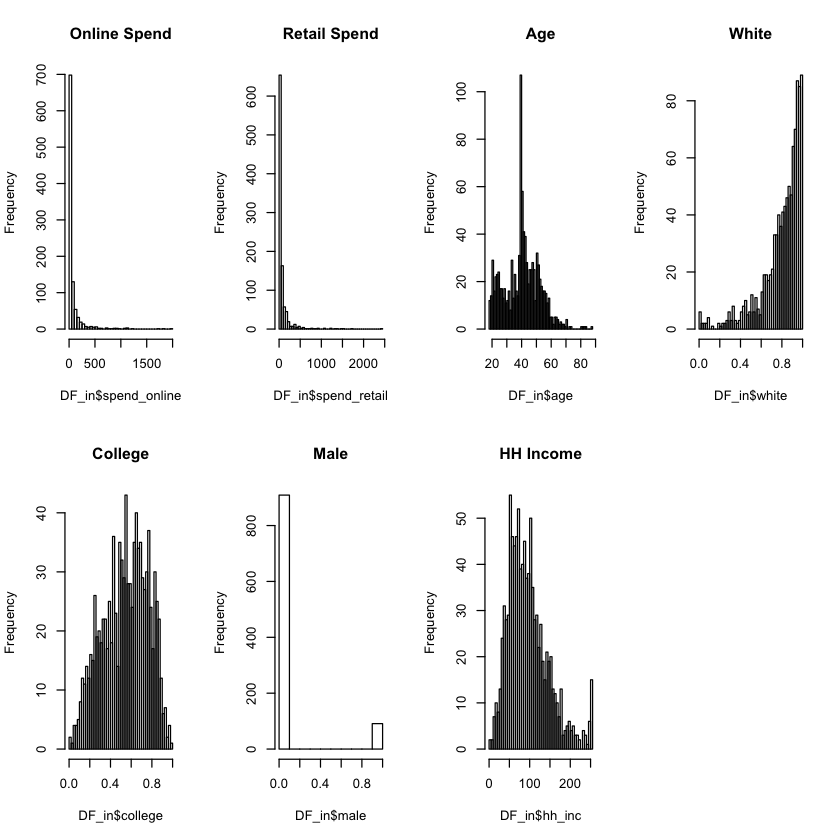

In [25]:
# use histograms to see if transformations are necessary
par(mfrow = c(2,4))
nbin = 50
hist(DF_in$spend_online,nbin, main="Online Spend")
hist(DF_in$spend_retail,nbin, main="Retail Spend")
hist(DF_in$age,nbin, main="Age")
hist(DF_in$white,nbin, main="White")
hist(DF_in$college,nbin, main="College")
hist(DF_in$male, main="Male")
hist(DF_in$hh_inc,nbin, main="HH Income")

Need to log-transform the highly skewed spend variables.

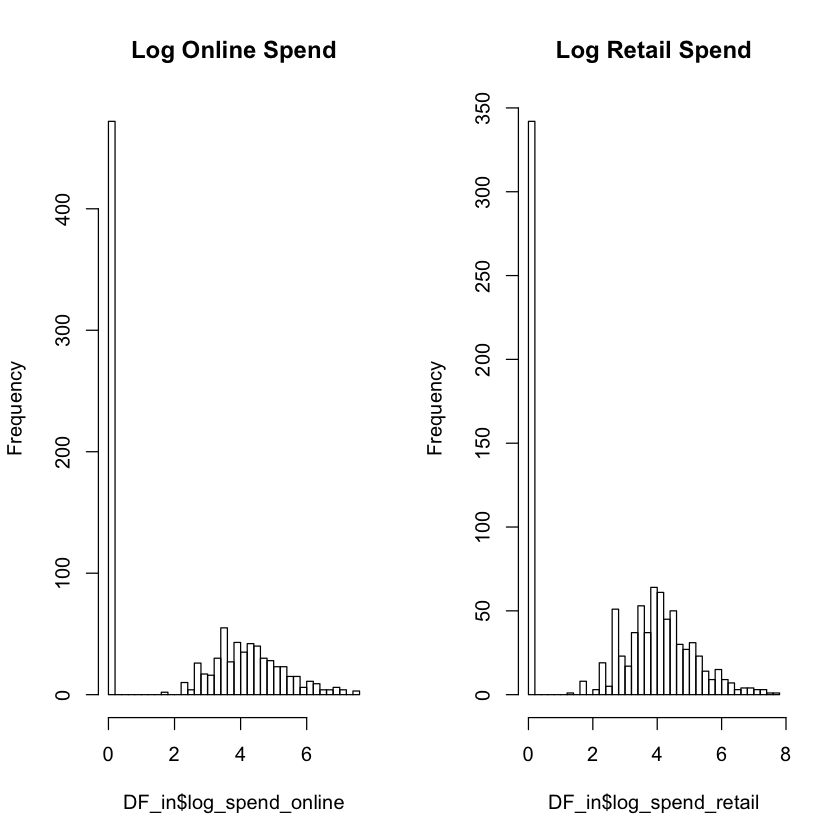

In [26]:
# log-transform skewed spend variables
DF_in$log_spend_online = log(1+DF_in$spend_online)
DF_in$log_spend_retail = log(1+DF_in$spend_retail)

# histograms
par(mfrow = c(1,2))
hist(DF_in$log_spend_online,nbin, main="Log Online Spend")
hist(DF_in$log_spend_retail,nbin, main="Log Retail Spend")

In [27]:
# create dataframe with transformed variables, omit non-cluster variables
DF = DF_in
DF$iid = NULL
DF$spend_online = NULL
DF$spend_retail = NULL

## Gower Distance

In [28]:
# calculate Gower distance matrix
library(cluster)
distMat_gower <- daisy(DF, metric = "gower", warnType = FALSE)

In [29]:
# k-means with 2, 3, and 4 segments

# 2 segments
clu_gower_2 <- kmeans(distMat_gower, centers = 2, nstart = 10)
DF_in$clu_gower_2 <- clu_gower_2$cluster

# 3 segments
clu_gower_3 <- kmeans(distMat_gower, centers = 3, nstart = 10)
DF_in$clu_gower_3 <- clu_gower_3$cluster

# 4 segments
clu_gower_4 <- kmeans(distMat_gower, centers = 4, nstart = 10)
DF_in$clu_gower_4 <- clu_gower_4$cluster

## Elbow Plot

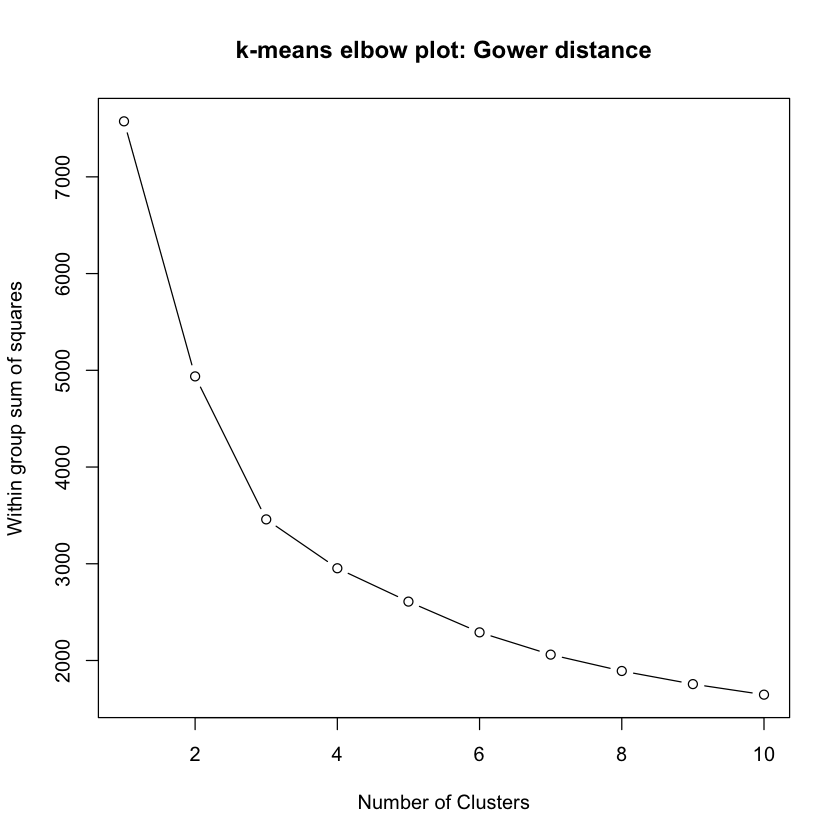

In [30]:
# visualize number of clusters
Nclus <- 10
wss <- rep(0, Nclus)
for (i in 1:Nclus) {
  res = kmeans(distMat_gower, centers = i, nstart = 10)
  wss[i] <- sum(res$withinss)
}

plot( 1:Nclus, wss, type = "b", xlab = "Number of Clusters",
      ylab = "Within group sum of squares",
      main = "k-means elbow plot: Gower distance")

3 or 4 clusters seem appropriate.

## Cluster Sizes and Centroids

In [31]:
# sizes of 2 clusters
table(DF_in$clu_gower_2) / dim(DF_in)[1]


    1     2 
0.552 0.448 

In [32]:
# centroid averages of 2 clusters
round( aggregate( cbind( spend_online, spend_retail, age, white, college, male, hh_inc ) ~ clu_gower_2, data = DF_in, FUN = mean), 3)

clu_gower_2,spend_online,spend_retail,age,white,college,male,hh_inc
1,12.038,96.838,41.629,0.819,0.594,0.065,105.500
2,146.864,54.800,40.022,0.776,0.482,0.123,84.861


Segments must be 1) substantial, 2) actionable, and 3) differentiable.

The segments are appropriately sized, and there is a difference in online vs. retail spending. The store could target online customers with emails and retail customers with coupons.

In [33]:
# sizes of 3 clusters
table(DF_in$clu_gower_3) / dim(DF_in)[1]


    1     2     3 
0.423 0.470 0.107 

In [34]:
# centroid averages of 2 clusters
round( aggregate( cbind( spend_online, spend_retail, age, white, college, male, hh_inc ) ~ clu_gower_3, data = DF_in, FUN = mean), 3)

clu_gower_3,spend_online,spend_retail,age,white,college,male,hh_inc
1,144.403,59.455,40.189,0.804,0.501,0.00,86.059
2,3.731,93.536,41.649,0.819,0.592,0.00,105.128
3,89.758,83.117,40.505,0.694,0.498,0.85,97.577


While segment 3 is smaller than the others, 10% is still substantial. Segments 1 and 2 are similar to the 2-cluster analysis, but cluster 3 segments male shoppers. In addition to the previous actions, the store can make promotions for males.

In [35]:
# sizes of 4 clusters
table(DF_in$clu_gower_4) / dim(DF_in)[1]


    1     2     3     4 
0.102 0.303 0.428 0.167 

In [36]:
# centroid averages of 4 clusters
round( aggregate( cbind( spend_online, spend_retail, age, white, college, male, hh_inc ) ~ clu_gower_4, data = DF_in, FUN = mean), 3)

clu_gower_4,spend_online,spend_retail,age,white,college,male,hh_inc
1,73.808,71.721,40.843,0.710,0.505,0.892,98.485
2,110.368,0.033,40.370,0.795,0.484,0.000,85.082
3,0.023,88.895,41.561,0.816,0.582,0.000,102.475
4,188.384,195.402,40.257,0.820,0.578,0.000,99.215


The segment sizes are substantial. There is a pure online market in segment 2 and a pure retail market in segment 3. Males dominate segment 1, and segment 4 are females that spend evenly across online and retail.

I would recommend three segments for this cluster analysis. The segements are very distinct and can be marketed to easily.